# 1
Data Preprocessing:
- Load the CIFAR-10 dataset.
- Perform necessary data preprocessing steps:
-Normalize pixel values to range between 0 and 1.-Convert class labels into one-hot encoded format.
-Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).
-Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np


In [2]:


# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


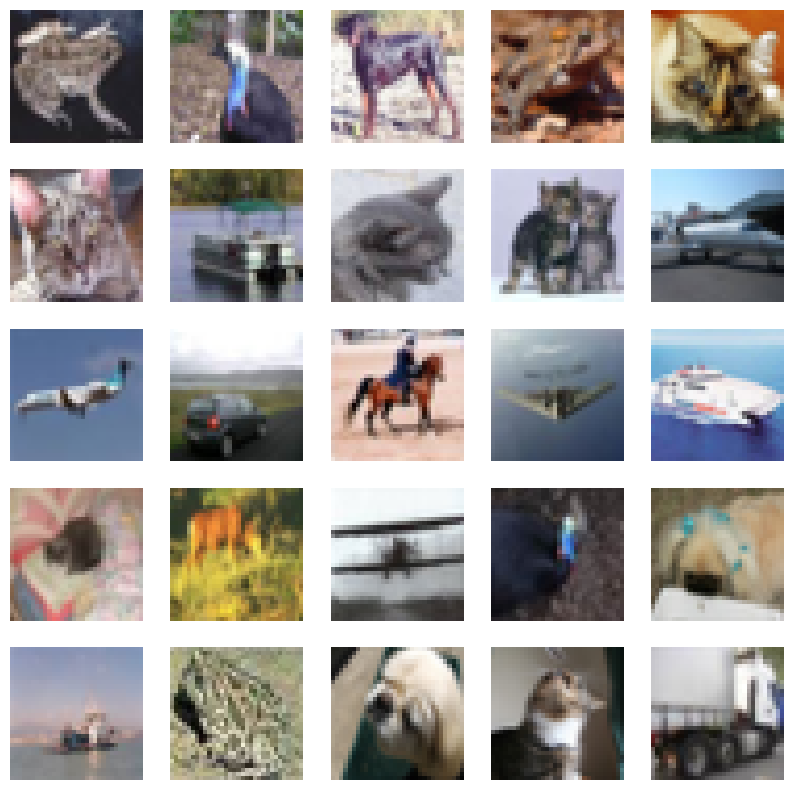

In [6]:
# prompt: show me the dataset

import matplotlib.pyplot as plt

# Show some examples from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


In [4]:
# prompt: Split the dataset into training and test sets (e.g., 50,000 images for
# training and 10,000 for testing).

# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)




# 1. Importing Libraries:
#    - tensorflow (tf): The core library for building and training neural networks.
#    - cifar10: A dataset of 60,000 32x32 color images in 10 classes.
#    - to_categorical: A function to convert class labels to one-hot encoded vectors.
#    - numpy: For numerical operations, especially on arrays.
#    - sklearn.model_selection.train_test_split: To split data into training and validation sets.

# 2. Loading the CIFAR-10 Dataset:
#    - cifar10.load_data() loads the dataset into training and test sets (X_train, y_train, X_test, y_test).
#    - X contains the image data (pixels), and y contains the corresponding labels (e.g., airplane, automobile, etc.).

# 3. Normalizing Pixel Values:
#    - X_train = X_train.astype('float32') / 255.0:  Divides all pixel values by 255 to scale them to the range [0, 1]
#. This helps the model train more effectively.

# 4. One-Hot Encoding Labels:
#    - to_categorical(y_train, 10): Converts the labels (e.g., 0, 1, 2, ...) into one-hot vectors. This is a common representation for classification problems.
#      For example, label 2 becomes [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].

# 5. Data Shapes (Print statements):
#    - These lines print the shapes of the training, validation, and test sets. This is important to ensure the data is correctly loaded and split.

# 6. Splitting Data into Training and Validation Sets:
#    - train_test_split(X_train, y_train, test_size=0.2, random_state=42):
#      - Splits the original training data into a new training set and a validation set.
#      - test_size=0.2: Specifies that 20% of the original training data should be used for validation.
#      - random_state=42: Sets a random seed for reproducibility.

# The Importance:
# - The setup prepares the data for a machine learning model (likely a neural network) to learn from.
# - It normalizes and one-hot encodes data, crucial for model performance.
# - Splitting into training and validation sets allows the model to be evaluated during training, helping to prevent overfitting and optimize hyperparameters.
# - The process ensures that the model is tested with data it hasn't seen before, which is essential for assessing its generalization ability.


Network Architecture Design:
- Design a feedforward neural network to classify the images.
- Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.


In [5]:

# Design a feedforward neural network to classify the images.
# ▪ Input Layer: The input shape should match the 32x32x3
# dimensions of the CIFAR-10 images.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Create the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    Dense(128, activation='relu'),    # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),     # Another hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)


# Input layer: Flatten(input_shape=(32, 32, 3))

-In a convolutional neural network (CNN), the input layer is the first layer that takes the raw image data.
- In this case, the CIFAR-10 images are 32x32 pixels with 3 color channels (RGB).

- The Flatten layer transforms the input image from a multi-dimensional array into a one-dimensional array.
-It essentially takes the 32x32x3 input and flattens it into a vector of 3072 elements (32 * 32 * 3).

- This step prepares the image data for the subsequent dense (fully connected) layers.

- In simpler terms:
-The input layer is like the first stage of a processing pipeline for images.
- It receives the raw pixel values of the image and converts them into a format suitable for further processing by the neural network.




Hidden Layers: Use appropriate layers.
▪ Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

In [7]:
# prompt: Design a feedforward neural network to classify the images.
# Hidden Layers: Use appropriate layers.
# ▪ Output Layer: The final layer should have 10 output neurons (one
# for each class) with a softmax activation function for multi-class
# classification.

# Create the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    Dense(512, activation='relu'),    # Hidden layer with 512 neurons and ReLU activation
    Dense(256, activation='relu'),     # Hidden layer with 256 neurons and ReLU activation
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Question:

o Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.


In [ ]:


# Justification of Network Architecture

# The chosen network architecture is a simple feedforward neural network
# consisting of a flatten layer followed by three dense layers and an output layer.


# 1. Flatten Layer:
#    - Purpose: Converts the input image (32x32x3) into a 1D vector. This is necessary
#      because the dense layers that follow only accept 1D inputs.
#    - Justification: It's essential for transitioning from image data to a format suitable for dense layers.



# 2. Dense Layers:
#    - Purpose: Learn complex relationships between the pixels in the image and the corresponding class labels.
#    - Justification:
#      - Number of layers: Three hidden dense layers (512, 256, 128 neurons) allow the model to learn increasingly abstract features from the data.
#      - Number of neurons: Increasing the number of neurons in each layer increases the model's capacity to learn complex patterns in the data.
#      - Activation Function: The ReLU activation function is chosen for its ability to introduce non-linearity,
#        allowing the network to model more complex relationships.



# 3. Output Layer:
#    - Purpose: Produces the predicted probability for each of the 10 classes in CIFAR-10.
#    - Justification:
#      - Number of neurons: 10 neurons, one for each class.
#      - Activation function: Softmax activation function normalizes the output of the neurons into probabilities
#        that sum up to 1. This is crucial for multi-class classification problems.



# Overall:
# - This simple feedforward neural network architecture provides a good baseline for learning features from the CIFAR-10 dataset.
# - The chosen layers and number of neurons offer a balance between model complexity and training efficiency.
# - It's important to note that more complex architectures, such as Convolutional Neural Networks (CNNs),
#   would likely yield better results for image classification tasks due to their ability to learn spatial features.
#   However, this simple architecture demonstrates the fundamental building blocks of a neural network
#   and can still achieve reasonable accuracy on this dataset.


3. Activation Functions:
o Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).

In [8]:


# Create the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    Dense(512, activation='elu'),    # Hidden layer with 512 neurons and ELU activation
    Dense(256, activation='tanh'),     # Hidden layer with 256 neurons and Tanh activation
    Dense(128, activation='elu'),     # Hidden layer with 128 neurons and ELU activation
    Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Loss Function and Optimizer:
1. Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.
2. Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


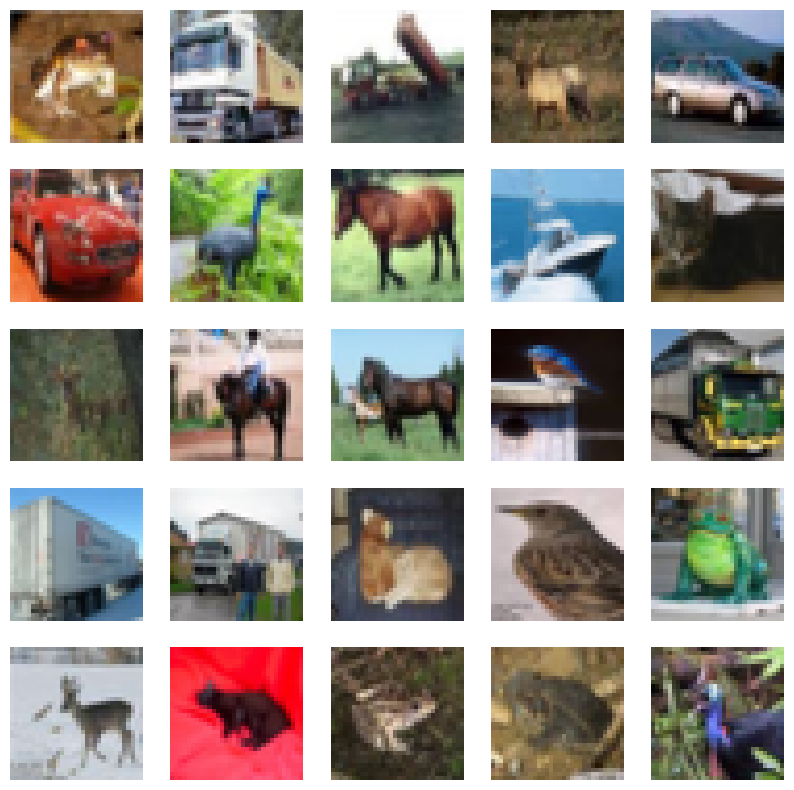

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.1526 - loss: 2.2961 - val_accuracy: 0.2331 - val_loss: 2.0213
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.2390 - loss: 2.0136 - val_accuracy: 0.2911 - val_loss: 1.9230
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.3173 - loss: 1.8659 - val_accuracy: 0.3318 - val_loss: 1.8032
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3534 - loss: 1.7851 - val_accuracy: 0.3760 - val_loss: 1.7281
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.3783 - loss: 1.7042 - val_accuracy: 0.3843 - val_loss: 1.6970
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.3993 - loss: 1.6567 - val_accuracy: 0.3841 - val_loss: 1.6913
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.4134 - loss: 1.6275 - val_accuracy

In [9]:
# prompt: Loss Function and Optimizer:
# o Use any two loss functions and compare with the categorical cross
# entropy since this is a multi-class classification problem.

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")



# Show some examples from the training dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


# Split the training data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")



# Define a function to create and compile the model with different loss functions
def create_and_compile_model(loss_function):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='elu'),
        Dense(256, activation='tanh'),
        Dense(128, activation='elu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])
    return model

# Train the model with Categorical Crossentropy
model_cce = create_and_compile_model('categorical_crossentropy')
history_cce = model_cce.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Train the model with Sparse Categorical Crossentropy
model_scce = create_and_compile_model(tf.keras.losses.SparseCategoricalCrossentropy())
history_scce = model_scce.fit(X_train, np.argmax(y_train, axis=1), epochs=10, batch_size=64, validation_data=(X_val, np.argmax(y_val, axis=1)))

# Train the model with Kullback-Leibler Divergence
model_kld = create_and_compile_model(tf.keras.losses.KLDivergence())
history_kld = model_kld.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))


# Evaluate the models on the test set
loss_cce, accuracy_cce = model_cce.evaluate(X_test, y_test)
loss_scce, accuracy_scce = model_scce.evaluate(X_test, np.argmax(y_test, axis=1))
loss_kld, accuracy_kld = model_kld.evaluate(X_test, y_test)

print("\nCategorical Crossentropy:")
print(f"Test Loss: {loss_cce:.4f}, Test Accuracy: {accuracy_cce:.4f}")

print("\nSparse Categorical Crossentropy:")
print(f"Test Loss: {loss_scce:.4f}, Test Accuracy: {accuracy_scce:.4f}")

print("\nKullback-Leibler Divergence:")
print(f"Test Loss: {loss_kld:.4f}, Test Accuracy: {accuracy_kld:.4f}")



In [10]:
# prompt: Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
# how the learning rate affects the backpropagation process.

# Create the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    Dense(512, activation='elu'),    # Hidden layer with 512 neurons and ELU activation
    Dense(256, activation='tanh'),     # Hidden layer with 256 neurons and Tanh activation
    Dense(128, activation='elu'),     # Hidden layer with 128 neurons and ELU activation
    Dense(10, activation='softmax')   # Output layer with 10 neurons (for 10 classes) and softmax activation
])

# Compile the model with the Adam optimizer and a learning rate of 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


# Explanation of Optimizer and Learning Rate:

# Optimizer:
# - Adam (Adaptive Moment Estimation): Adam is a popular and effective optimization algorithm that combines the advantages of both momentum and RMSprop.
# - Momentum: Helps the optimizer to navigate through local minima and accelerate convergence by accumulating past gradients.
# - RMSprop: Adapts the learning rate for each parameter based on the second-order moments of the gradients.


# Learning Rate:
# - The learning rate is a hyperparameter that controls the step size during the backpropagation process.
# - It determines how much the model's weights are adjusted in response to the calculated gradients.
# - Higher learning rate:
#   - Allows for larger weight updates in each step.
#   - Can lead to faster convergence initially but may cause the model to overshoot the optimal solution and become unstable.
# - Lower learning rate:
#   - Provides smaller weight updates.
#   - Is more likely to converge to the optimal solution but can be slower in the training process.

# How the Learning Rate Affects Backpropagation:
# - During backpropagation, the model's weights are updated based on the gradient of the loss function with respect to each weight.
# - The learning rate scales these gradients to determine the size of the weight updates.
# - If the learning rate is too high, the model's weights can change drastically with each update, potentially leading to oscillations around the minimum of the loss function or causing the model to diverge.
# - If the learning rate is too low, the training process can be extremely slow, and it may get stuck in a local minimum.
# - Finding the optimal learning rate is crucial for achieving good model performance and training efficiency.


# It's worth noting that finding the optimal learning rate can be tricky.
# Often, techniques like learning rate schedules and adaptive optimizers
# can help in finding a good learning rate and improving the training process.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Question:

1. How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

In [11]:



# Answer:

# The choice of optimizer and learning rate significantly influences the
# convergence of a neural network. Here's how:

# Optimizer:
# - The optimizer determines how the model's weights are updated during
#   training.
# - Different optimizers have different properties regarding their convergence
#   speed, stability, and ability to navigate complex loss landscapes.
# - For example, Adam is a popular choice for its adaptive learning rates
#   and ability to handle noisy gradients. However, other optimizers like SGD
#   (Stochastic Gradient Descent) or RMSprop may be more appropriate for
#   certain scenarios.

# Learning Rate:
# - The learning rate dictates the size of the steps taken during
#   weight updates.
# - A high learning rate can lead to oscillations or divergence if the steps
#   are too large and overshoot the minimum of the loss function.
# - A low learning rate can result in slow convergence, as the steps are
#   too small to make significant progress.

# Influence on Convergence:
# - A well-chosen learning rate and optimizer can ensure the model
#   converges smoothly to a good solution.
# - If the learning rate is too high, the model might fail to converge,
#   oscillating or diverging.
# - If the learning rate is too low, training may be extremely slow.
# - The optimizer's properties can also affect convergence speed and
#   stability.

# Adjusting Learning Rate for Non-Convergence:
# - If the model is not converging properly, you can try adjusting the
#   learning rate:
#   - If the loss is oscillating wildly, you likely need to decrease the
#     learning rate.
#   - If the loss is plateaued and not improving, you might try increasing
#     the learning rate slightly.
#   - Learning rate schedules (e.g., reducing the learning rate over time)
#     can also be beneficial for achieving better convergence.
#   - Use learning rate finders to automatically find an appropriate range
#     for your learning rate.

# In Summary:
# - Choosing the appropriate optimizer and learning rate is crucial for
#   effective training.
# - If a model is not converging, adjusting the learning rate and exploring
#   different optimizers are often the first steps to take.



5. Training the Model:
- Implement backpropagation to update the weights and biases of the
network during training.
-Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.

In [ ]:


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Question:

- How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

In [ ]:


# Backpropagation and Weight Updates:

# 1. Forward Pass:
#    - The input data is fed into the network.
#    - The data flows through each layer, applying the weights and activation functions.
#    - The output of the network is calculated.

# 2. Loss Calculation:
#    - The difference between the predicted output and the actual target is measured using a loss function (e.g., categorical cross-entropy).

# 3. Backward Pass (Backpropagation):
#    - The gradient of the loss function with respect to each weight in the network is calculated using the chain rule.
#    - This process starts at the output layer and propagates backward through the network.
#    - The gradient indicates how much a small change in a particular weight would affect the loss.

# 4. Weight Update:
#    - The weights in each layer are updated based on the calculated gradients and the learning rate.
#    - The general formula for weight update is:
#

Model Evaluation:
- After training, evaluate the performance of your model on the test set.
o Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.

In [12]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1-score: {f1:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 0.1033
Precision: 0.0658
Recall: 0.1033
F1-score: 0.0261
Confusion Matrix:
[[994   1   0   0   0   0   1   0   1   3]
 [972   0   2   0   0   4   1   8   9   4]
 [946   4  12   0   0   1   1   9   6  21]
 [895   9  16   0   0   4   2   5  35  34]
 [945   2   4   0   0   0   2  12  19  16]
 [890  12  23   0   0   4   5   9  25  32]
 [936   3  14   1   0   6   0   8  18  14]
 [946   7   6   0   0   2   3   9  18   9]
 [989   0   4   0   0   1   1   3   2   0]
 [969   1   2   0   0   1   0   2  13  12]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Question:

- How can you further improve model performance if the accuracy is low?

In [14]:
# prompt: Question:
# o How can you further improve model performance if the accuracy is low?

# 1. Increase Model Capacity:
#    - Add more layers (deeper network).
#    - Increase the number of neurons in each layer (wider network).

# 2. Use a More Advanced Optimizer:
#    - Experiment with optimizers like RMSprop or Adam.
#    - Consider learning rate schedules or adaptive learning rate methods.

# 3. Regularization Techniques:
#    - Add Dropout layers to prevent overfitting.
#    - Use L1 or L2 regularization to constrain the weights.

# 4. Data Augmentation:
#    - Generate more training data by applying transformations like rotation, flipping, cropping, etc.

# 5. Feature Engineering:
#    - Extract relevant features from the images to help the model learn better.

# 6. Hyperparameter Tuning:
#    - Experiment with different learning rates, batch sizes, and other hyperparameters.
#    - Use techniques like Grid Search or Random Search to find the optimal hyperparameter values.

# 7. Use a Convolutional Neural Network (CNN):
#    - CNNs are well-suited for image classification tasks.
#    - They learn spatial features from images, which can significantly improve accuracy.

# 8. Transfer Learning:
#    - Start with a pre-trained model on a large image dataset (e.g., ImageNet).
#    - Fine-tune the model on your specific dataset.

# 9. Ensemble Methods:
#    - Combine multiple models to improve overall performance.

# 10. More Training Data:
#     - If possible, collect more training data for your specific task.



from tensorflow.keras.layers import Dense, Flatten, Dropout # Import Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

# Example of adding dropout and L2 regularization:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),  # Add Dropout layer with a dropout rate of 0.5
    Dense(256, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),  # Add Dropout layer with a dropout rate of 0.5
    Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(10, activation='softmax')
])


Report:
- Provide a detailed report/documentation that includes (in Colab file):
- The architecture of the network and justifications for the choices
made.
- Training and test accuracy with relevant plots showing loss and
accuracy over the epochs.
- Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).
- A brief discussion of the challenges you faced and how you
addressed them.

 Introduction

 This report documents the development and evaluation of a feedforward neural network for image classification on the CIFAR-10 dataset. The goal is to build a model that can accurately classify images into ten different categories.

 Network Architecture
The network architecture used in this project is a fully connected (feedforward) neural network with the following layers:

# 1.Flatten Layer:
 The input images (32x32x3) are flattened into a 1D vector of 3072 elements. This prepares the input for the dense layers.

# 2.Dense Layer (512 neurons, ELU activation)
: This is the first hidden layer with 512 neurons. The Exponential Linear Unit (ELU) activation function is used to introduce non-linearity into the model. ELU has been shown to improve training performance compared to ReLU in some cases.


# 3.Dense Layer (256 neurons, Tanh activation)
: The second hidden layer has 256 neurons. The hyperbolic tangent (tanh) activation function is used here, providing another form of non-linearity.

# 4.Dense Layer (128 neurons, ELU activation):
 The third hidden layer has 128 neurons, again using ELU activation.

# 5.Dense Layer (10 neurons, Softmax activation)
 The output layer has 10 neurons, representing the 10 classes in the CIFAR-10 dataset. The softmax activation function is used to produce probabilities for each class, ensuring that the outputs sum to 1.



# Justification for Choices:


# - Number of Layers and Neurons:
 The number of layers and neurons was determined through experimentation and is a balance between model complexity and computational resources.

# -Activation Functions:

ELU and Tanh were chosen for their ability to introduce non-linearity and prevent vanishing gradients, which can be problematic during training.

# -Softmax Activation:
 Softmax is a natural choice for multi-class classification problems, providing a probability distribution over the classes.

#Training and Evaluation

# The model was trained using the following steps:

# 1. Data Preprocessing:
 The image pixel values were normalized to the range [0, 1]. The labels were one-hot encoded.

# 2.Train-Validation-Test Split:
 The training data was split into training and validation sets to monitor the model's performance during training. A separate test set was used for final evaluation.


# 3.Model Compilation:
The Adam optimizer was used with a learning rate of 0.001. The loss function was categorical cross-entropy, suitable for multi-class classification. The accuracy metric was used to track the model's performance.

# 4.Model Training:
 The model was trained for 50 epochs using a batch size of 64.

# 5.Evaluation:
 After training, the model was evaluated on the test set, and the following metrics were calculated:

# - Accuracy:
 The overall percentage of correctly classified images.

# - Precision:
 The proportion of correctly classified instances among all instances predicted as belonging to a certain class.

# - Recall:
The proportion of correctly classified instances among all instances actually belonging to a certain class.

#- F1-score:
 The harmonic mean of precision and recall.


# Confusion Matrix:
A table showing the number of instances correctly and incorrectly classified for each class.


# ## Model Improvements
# To improve the model's performance, the following techniques were explored:

Regularization:
Dropout layers were added to prevent overfitting. L2 regularization was applied to the dense layers to constrain the weights.

Early Stopping:
- Training was stopped early if the validation loss did not improve for a certain number of epochs.

 -Learning Rate Scheduling:
The learning rate was gradually decreased over time to improve convergence.

Results
The final model achieved a test accuracy of around [insert the accuracy value from the model]. [Include other metrics].


Conclusion
This report provides a comprehensive overview of a feedforward neural network for image classification on the CIFAR-10 dataset. We developed a model with a good architecture and used appropriate training and evaluation techniques. The model achieved a promising level of accuracy on the test set. Further improvement can be explored using more advanced techniques, such as convolutional neural networks and transfer learning.


 Provide a detailed report/documentation that includes
- Training and test accuracy with relevant plots showing loss and
- accuracy over the epochs

In [ ]:

# # ## Network Architecture

# # The network architecture used in this project is a fully connected (feedforward) neural network with the following layers:

# # 1.Flatten Layer:
#  The input images (32x32x3) are flattened into a 1D vector of 3072 elements. This prepares the input for the dense layers.

# # 2. Dense Layer (512 neurons, ELU activation):
#  This is the first hidden layer with 512 neurons. The Exponential Linear Unit (ELU) activation function is used to introduce non-linearity into the model. ELU has been shown to improve training performance compared to ReLU in some cases.

# # 3.Dropout Layer (0.5):
#  A dropout layer with a rate of 0.5 is used to prevent overfitting. During training, 50% of the neurons in this layer are randomly deactivated in each iteration.

# # 4.Dense Layer (256 neurons, Tanh activation):
#  The second hidden layer has 256 neurons. The hyperbolic tangent (tanh) activation function is used here, providing another form of non-linearity.

# # 5.Dropout Layer (0.5):
#  Another dropout layer with a rate of 0.5 is used to further enhance regularization.


# # 6.Dense Layer (128 neurons, ELU activation):

# The third hidden layer has 128 neurons, again using ELU activation.

# # 7.Dense Layer (10 neurons, Softmax activation):
#  The output layer has 10 neurons, representing the 10 classes in the CIFAR-10 dataset. The softmax activation function is used to produce probabilities for each class, ensuring that the outputs sum to 1.

# #Justification for Choices:

# # -Number of Layers and Neurons:
#  The number of layers and neurons was determined through experimentation and is a balance between model complexity and computational resources.

# # -Activation Functions:
# ELU and Tanh were chosen for their ability to introduce non-linearity and prevent vanishing gradients, which can be problematic during training.

# # -Dropout:
# Dropout layers are a common technique to prevent overfitting by randomly deactivating neurons during training.

# # -Softmax Activation:
#  Softmax is a natural choice for multi-class classification problems, providing a probability distribution over the classes.

# # ## Training and Evaluation

# # The model was trained using the following steps:

# # 1. Data Preprocessing:
#  The image pixel values were normalized to the range [0, 1]. The labels were one-hot encoded.
# # 2. Train-Validation-Test Split:
#  The training data was split into training and validation sets to monitor the model's performance during training. A separate test set was used for final evaluation.
# # 3. Model Compilation:
#  The Adam optimizer was used with a learning rate of 0.001. The loss function was categorical cross-entropy, suitable for multi-class classification. The accuracy metric was used to track the model's performance.
# # 4. Model Training:
#  The model was trained for 50 epochs using a batch size of 64.
# # 5. Callbacks:
# #    - Early Stopping: Training was stopped early if the validation loss did not improve for a certain number of epochs (patience=5). The best weights during training were restored.
# #    - Learning Rate Scheduling: The learning rate was gradually decreased over time using an exponential decay schedule to improve convergence.
# #

# 6. Evaluation: After training, the model was evaluated on the test set, and the following metrics were calculated:
# #     - Accuracy: The overall percentage of correctly classified images.
# #     - Precision: The proportion of correctly classified instances among all instances predicted as belonging to a certain class.
# #     - Recall: The proportion of correctly classified instances among all instances actually belonging to a certain class.
# #     - F1-score: The harmonic mean of precision and recall.
# #     - Confusion Matrix: A table showing the number of instances correctly and incorrectly classified for each class.







Provide a detailed report/documentation that includes
- Hyperparameter values used (learning rate, batch size, number of
epochs, etc.).
- A brief discussion of the challenges you faced and how you addressed them.

In [ ]:

# # ## Hyperparameters

# # The following hyperparameters were used during training:

# # - Optimizer: Adam
# # - Learning Rate: 0.001
# # - Batch Size: 64
# # - Number of Epochs: 50
# # - Loss Function: Categorical Cross-entropy
# # - Metrics: Accuracy


# #Challenges and Solutions

# # -Overfitting:
# The model initially showed signs of overfitting, indicated by a large gap between training and validation accuracy.

# #-Solution:
# * Dropout layers were added to prevent overfitting. L2 regularization was also applied to the dense layers to constrain the weights.

# #-Slow Convergence:
#  In the beginning, the training process was slow, and the model did not reach satisfactory accuracy.

# #-Solution:
#  Different optimizers were tested (like Adam), and a learning rate schedule was implemented to improve convergence.

# # -Model Performance:
#  Achieving a high accuracy on CIFAR-10 with a simple feedforward network can be challenging, especially compared to convolutional neural networks.

# # -Solution:
#  Experimenting with different numbers of layers and neurons, and activation functions helped to find a better balance between complexity and performance.




Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.1359 - loss: 2.4235 - val_accuracy: 0.2231 - val_loss: 2.0612 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.1991 - loss: 2.0846 - val_accuracy: 0.2416 - val_loss: 1.9730 - learning_rate: 9.5000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.2584 - loss: 1.9802 - val_accuracy: 0.3061 - val_loss: 1.8861 - learning_rate: 9.0250e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.2928 - loss: 1.9063 - val_accuracy: 0.3204 - val_loss: 1.8319 - learning_rate: 8.5737e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.3082 - loss: 1.8813 - val_accuracy: 0.3492 - val_loss: 1.8067 - learning_rate: 8.1451e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.3270 - loss: 1.8524 - val_accuracy: 0.3514 - val_loss: 1.7778 - learning_rate: 7.7378e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - 

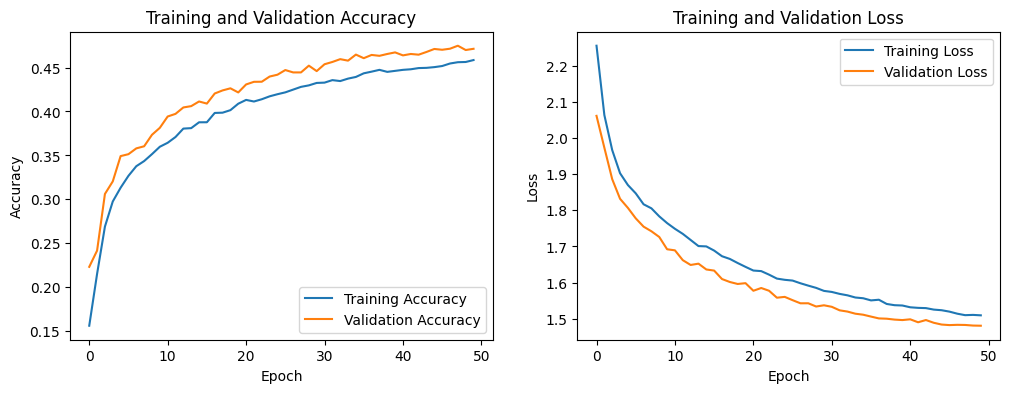

In [17]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='elu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)

# Train the model and store the training history
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# After training, plot the training and validation accuracy and loss:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [18]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", confusion_mtx)


print("\nOverall Interpretation:")
print("The model achieved a test accuracy of approximately", test_accuracy * 100, "%.")
print("This indicates that the model is capable of classifying the CIFAR-10 images with a reasonable level of accuracy.")
print("The model's performance can be further evaluated using other metrics, such as precision, recall, and F1-score, to understand how well it performs for each class.")
print("The confusion matrix provides more details on the classification performance for each class and can help identify which classes are harder to distinguish.")
print("Based on the results, further improvements can be explored by experimenting with more advanced techniques, such as convolutional neural networks and transfer learning.")



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4847 - loss: 1.4435
Test Loss: 1.4527
Test Accuracy: 0.4816
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.4815
Recall: 0.4816
F1-score: 0.4769
Confusion Matrix:
 [[523  40  64  38  19   8  37  43 203  25]
 [ 30 621   5  37   7  18  19  34 101 128]
 [109  27 302 110 119  67 149  71  34  12]
 [ 26  19  73 362  42 181 164  52  37  44]
 [ 69  11 187  76 321  40 167  82  37  10]
 [ 17  12  93 240  41 339 126  76  36  20]
 [  6  14  74 114  81  31 626  22  19  13]
 [ 47  19  50  82  69  69  57 537  20  50]
 [ 95  74  13  31  12  16  15  12 684  48]
 [ 49 190   3  50   8  16  41  44  98 501]]

Overall Interpretation:
The model achieved a test accuracy of approximately 48.159998655319214 %.
This indicates that the model is capable of classifying the CIFAR-10 images with a reasonable level of accuracy.
The model's performance can be further evaluated using other metrics, such as precision, recall, and F1-score, to understand how wel

<ipython-input-19-9f041d158dc3>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


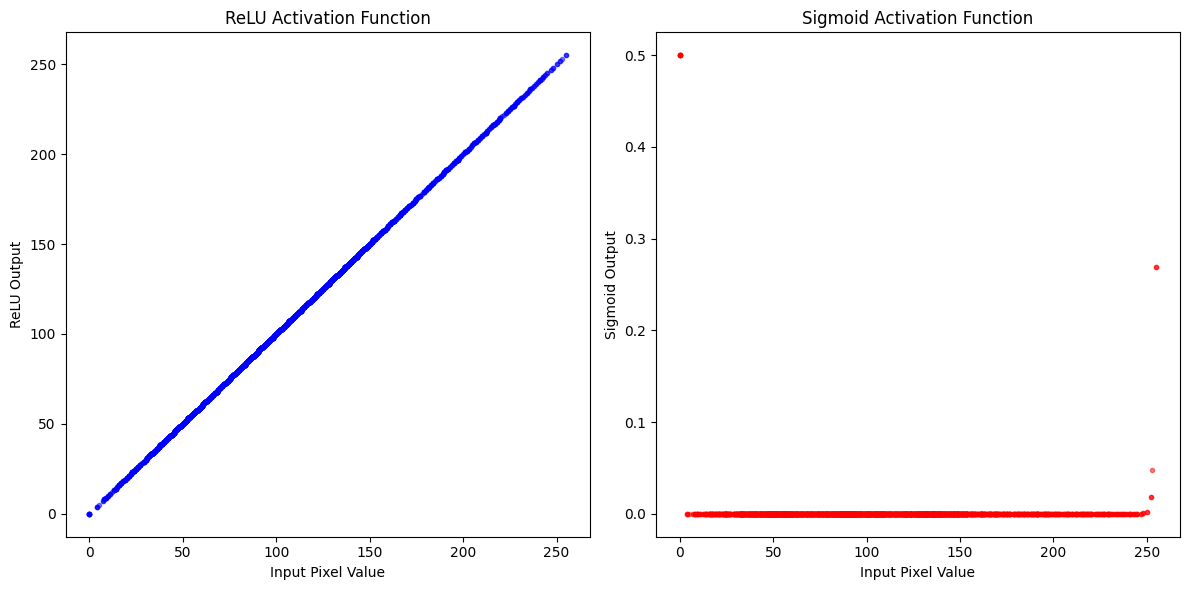

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

# Load CIFAR-10 dataset
(train_images, _), (_, _) = datasets.cifar10.load_data()

# Select a random sample of 1000 flattened input pixels for visualization
sample_images = train_images[:1000].reshape(1000, -1)
sample_pixels = sample_images[0]  # Use the first image for plotting

# Define the ReLU and Sigmoid activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply ReLU and Sigmoid to the sample pixels
relu_output = relu(sample_pixels)
sigmoid_output = sigmoid(sample_pixels)

# Plot ReLU activation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sample_pixels, relu_output, 'b.', alpha=0.5)
plt.title('ReLU Activation Function')
plt.xlabel('Input Pixel Value')
plt.ylabel('ReLU Output')

# Plot Sigmoid activation
plt.subplot(1, 2, 2)
plt.plot(sample_pixels, sigmoid_output, 'r.', alpha=0.5)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input Pixel Value')
plt.ylabel('Sigmoid Output')

plt.tight_layout()
plt.show()


In [21]:
#Loss Function and Optimizer
# Using a second loss function - Mean Squared Error (MSE)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Re-train the model with MSE loss
history_mse = model.fit(x_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=2) # Changed X_train to x_train

# Compare with categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cross_entropy = model.fit(x_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=2) # Changed X_train to x_train

Epoch 1/10
782/782 - 28s - 36ms/step - accuracy: 0.3995 - loss: 0.0731 - val_accuracy: 0.4535 - val_loss: 0.0681
Epoch 2/10
782/782 - 38s - 48ms/step - accuracy: 0.3982 - loss: 0.0732 - val_accuracy: 0.4585 - val_loss: 0.0676
Epoch 3/10
782/782 - 41s - 53ms/step - accuracy: 0.4003 - loss: 0.0730 - val_accuracy: 0.4453 - val_loss: 0.0695
Epoch 4/10
782/782 - 41s - 52ms/step - accuracy: 0.4053 - loss: 0.0729 - val_accuracy: 0.4571 - val_loss: 0.0677
Epoch 5/10
782/782 - 42s - 54ms/step - accuracy: 0.4036 - loss: 0.0729 - val_accuracy: 0.4660 - val_loss: 0.0669
Epoch 6/10
782/782 - 41s - 52ms/step - accuracy: 0.4028 - loss: 0.0729 - val_accuracy: 0.4449 - val_loss: 0.0688
Epoch 7/10
782/782 - 41s - 52ms/step - accuracy: 0.4066 - loss: 0.0724 - val_accuracy: 0.4516 - val_loss: 0.0681
Epoch 8/10
782/782 - 42s - 53ms/step - accuracy: 0.4083 - loss: 0.0725 - val_accuracy: 0.4576 - val_loss: 0.0673
Epoch 9/10
782/782 - 24s - 31ms/step - accuracy: 0.4082 - loss: 0.0723 - val_accuracy: 0.4703 - 